<a href="https://colab.research.google.com/github/mayaajike/machine-learning-25/blob/main/hiring_practices_ML_25%5B2%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install datacommons_pandas
!pip install datacommons_pandas --upgrade --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.2 MB/s eta 0:00:00


In [3]:
# Import Data Commons
import datacommons_pandas as dc

# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from collections import OrderedDict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import  StratifiedKFold
# Import other required libraries
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import geopandas as gpd
import os
import seaborn as sns
from sklearn import (
    datasets,
    impute,
    metrics,
    cluster,
    preprocessing,
    neighbors,
    linear_model,
    model_selection as skms
)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
data_variables = [
            'Count_Worker_NAICSTotalAllIndustries',
            'Count_Person_Employed',
            'Count_Person_Unemployed',
]
data_total = [
              "Count_Establishment_NAICSTotalAllIndustries",
              'Count_Person',
              'Count_Person',
 ]
variables = {
             'B18120_004E' : 'Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:',
             'B23006_027E' : "Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed",
             "B23006_020E" : "Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed",
             "B23006_013E" :'Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed',
             "B23006_006E" : 'Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed',
             "C23002A_020E" : 'Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed',
             "C23002A_007E" : 'Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed',
             "C23002B_020E" : 'Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed',
             "C23002B_007E" : 'Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed',
             "C23002D_020E" : 'Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed',
             "C23002D_007E" : 'Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed',
             "C23001_028E" : 'Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_021E" : 'Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_014E" : 'Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_007E" : 'Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_074E" : 'Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_067E" : 'Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_060E" : 'Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed',
             "C23001_053E" : 'Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed',
             'B18120_013E' : 'Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:',
  }
total = {
    'B18120_003E' : 'Estimate!!Total:!!In the labor force:!!Employed:',
    'B23006_026E' : "Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:",
    'B23006_019E' : "Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:",
    "B23006_012E" : 'Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:',
    "B23006_005E" : 'Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:',
    "C23002A_019E" : 'Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:',
    "C23002A_006E" : 'Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:',
    "C23002B_019E" : 'Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:',
    "C23002B_006E" : 'Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:',
    "C23002D_019E" : 'Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:',
    "C23002D_006E" : 'Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:',
    "C23001_027E" : 'Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:',
    "C23001_020E" : 'Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:',
    "C23001_013E" : 'Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:',
    "C23001_006E" : 'Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:',
    "C23001_073E" : 'Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:',
    "C23001_066E" : 'Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:',
    "C23001_059E" : 'Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:',
    "C23001_052E" : 'Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:',
    'B18120_012E' : 'Estimate!!Total:!!In the labor force:!!Unemployed:',
}


In [16]:
from requests import get
import pandas as pd

def get_response(response):
    response = get(url)
    json = response.json()
    return pd.DataFrame(json[1:], columns=json[0])


url = 'https://api.census.gov/data/2022/acs/acs1?get=NAME,'
for i in variables:
  url = url + i + ','
url = url[:-1] + "&for=state:*"
print(url)

https://api.census.gov/data/2022/acs/acs1?get=NAME,B18120_004E,B23006_027E,B23006_020E,B23006_013E,B23006_006E,C23002A_020E,C23002A_007E,C23002B_020E,C23002B_007E,C23002D_020E,C23002D_007E,C23001_028E,C23001_021E,C23001_014E,C23001_007E,C23001_074E,C23001_067E,C23001_060E,C23001_053E,B18120_013E&for=state:*


In [35]:

response = [["NAME","B18120_004E","B23006_027E","B23006_020E","B23006_013E","B23006_006E","C23002A_020E","C23002A_007E","C23002B_020E","C23002B_007E","C23002D_020E","C23002D_007E","C23001_028E","C23001_021E","C23001_014E","C23001_007E","C23001_074E","C23001_067E","C23001_060E","C23001_053E","B18120_013E","state"],
["Alabama","167003","635383","573201","481763","126624","656001","769141","286009","233121","19637","21243","238907","507333","115047","46433","222545","466836","109392","44263","17647","01"],
["Alaska","25976","97174","91997","78464","13482","91087","112227","3561","5223","12164","12793","35551","86530","17483","6165","30809","73107","14173","7167","2161","02"],
["Arizona","228261","1020699","866478","599264","242849","856361","979064","78200","84366","67880","70566","357273","835155","192364","69007","309591","686390","179844","64037","17886","04"],
["Arkansas","102648","332650","329378","316950","79052","401395","464189","90592","79073","12267","14052","143623","303345","77254","27434","122334","274503","62652","23904","10700","05"],
["California","948158","6602520","4151875","2956793","1831873","3153820","3652354","436367","457027","1462197","1513983","2081676","4764380","856347","272986","1724892","3980965","833286","292352","116242","06"],
["Colorado","191079","1288885","658433","444039","137769","971424","1129022","51136","62587","52731","50678","319281","801088","152721","60842","266863","675203","144107","60070","16511","08"],
["Connecticut","94172","711309","359153","329484","83333","537389","578451","102583","84057","42708","48180","189361","387281","81554","35557","185398","356537","81745","36668","13205","09"],
["Delaware","31505","162682","109517","101744","25017","130474","140032","58481","50924","8833","10952","47572","109428","21851","10355","46347","102325","19784","9958","3629","10"],
["District of Columbia","20097","242205","38766","26592","8956","85445","83461","63728","52394","10464","6491","28942","102858","13688","2525","28835","113625","18436","2922","2429","11"],
["Florida","570349","3283703","2472876","2092740","633060","2437285","2705454","785448","702011","153938","158438","1152001","2330220","453822","160676","1028659","2092639","458687","166533","56567","12"],
["Georgia","321915","1762336","1207364","1007219","316142","1187043","1369054","829267","706599","116464","132587","573748","1194497","252973","104251","542227","1138000","245527","95743","30062","13"],
["Hawaii","36083","212771","170101","132371","23640","58469","68657","3100","5979","120823","111463","70797","146016","26993","9478","66022","138273","26584","10263","3593","15"],
["Idaho","69560","260464","235115","172780","46530","327057","379379","null","null","7015","6648","96752","219573","52302","24274","79841","175687","53145","23338","4679","16"],
["Illinois","338971","2275082","1403163","1047178","340530","1732379","1943724","376743","306426","184059","204811","663345","1449045","298964","119470","596092","1293759","299618","117751","42152","17"],
["Indiana","230432","946911","801580","710851","184079","1160032","1319357","146574","128435","39561","47243","352167","760400","177950","77100","305431","656036","174142","79082","18997","18"],
["Iowa","105998","479336","429020","306634","66089","630396","687636","23378","28375","19549","23268","166228","364169","89975","46116","144242","321489","88709","44353","9246","19"],
["Kansas","101807","461059","353978","237659","69011","495153","549517","35341","31781","22374","23460","142728","324815","81652","38146","124446","284704","76948","37188","8446","20"],
["Kentucky","163453","581679","512791","445753","94005","766345","846922","73483","72020","15123","17147","221768","469617","106230","43463","199350","415031","104142","47151","16124","21"],
["Louisiana","152910","547468","483115","465347","128050","533199","610214","308244","233414","20890","22948","201283","460834","101682","35101","193752","446391","95377","41784","18324","22"],
["Maine","46113","222810","164946","144837","18065","287139","290661","null","null","null","null","69740","143060","27674","12720","66331","131263","31304","14436","3582","23"],
["Maryland","171639","1288396","612614","522362","157398","676962","747203","479919","403180","98980","103237","328815","694225","130839","44508","319183","660407","130973","53313","17663","24"],
["Massachusetts","185206","1610223","604238","574445","159580","1167313","1195312","116659","118889","136016","135752","363906","812506","161313","62645","348005","761776","179355","74834","24842","25"],
["Michigan","303868","1487318","1240710","879405","191262","1589558","1816452","282082","240531","76927","97548","496542","1072399","248806","103259","451112","932612","248197","108298","36019","26"],
["Minnesota","170179","1082687","762660","438453","111574","1061835","1158542","79682","93995","79098","84323","295437","694853","145371","72818","266172","613075","142169","75982","16000","27"],
["Mississippi","105894","310891","352067","270823","71854","316473","364231","226051","188172","5806","6416","129104","270327","67735","21680","124455","274850","59239","23128","9272","28"],
["Missouri","203566","925348","718695","607775","130237","1045491","1151845","156149","131029","33803","35030","299427","676909","147086","62724","272075","622594","143672","65966","20272","29"],
["Montana","40705","171010","135030","109977","17292","210246","239199","null","null","null","null","52940","126709","31293","13438","47244","112169","26433","12524","2913","30"],
["Nebraska","63821","312285","266865","164931","43817","356295","403205","21751","21004","12949","13361","98242","231837","55232","29021","86030","200906","51141","30512","3861","31"],
["Nevada","117119","363473","402995","340064","140598","313243","375403","63423","65023","72560","67608","168485","377323","68559","26227","137043","321630","66956","25751","11691","32"],
["New Hampshire","42671","275210","152737","143449","22703","291418","312220","null","null","9099","10427","75825","158227","31487","16266","69497","140859","32014","17163","3030","33"],
["New Jersey","212896","1946228","851571","787793","256080","1101943","1231825","283298","253424","220234","256820","518166","1057985","193438","69650","460925","928414","186291","71107","29452","34"],
["New Mexico","73886","257706","234599","173504","63981","193164","207194","7735","10693","10900","9639","92776","213780","51112","20747","83047","190259","45718","20774","7451","35"],
["New York","468477","3793263","1841969","1587655","619536","2412282","2594268","646152","549500","422565","434123","986575","2211967","391322","116918","924772","2030027","427291","146408","63281","36"],
["North Carolina","305237","1742497","1235466","867231","286393","1442232","1584914","533282","441935","83249","93048","552714","1132791","239319","96104","514459","1062457","247009","106391","27276","37"],
["North Dakota","26891","116833","115917","67017","13402","149093","172444","null","null","null","null","35690","101961","23858","8580","27946","83544","22681","12560","1569","38"],
["Ohio","369561","1776349","1328927","1226664","232627","2005553","2226996","315746","273597","64357","83774","592135","1290415","277893","117298","530243","1151441","274344","135591","35303","39"],
["Oklahoma","161381","488384","439399","390717","117585","530248","604713","57766","56092","23954","23362","182571","431982","105212","42128","160522","372614","93924","38463","14742","40"],
["Oregon","153563","706247","533155","333353","119495","689545","747657","18560","22934","53229","54153","219773","512157","96214","37082","197602","447389","95302","42784","17319","41"],
["Pennsylvania","409450","2187978","1289504","1365247","252956","2126595","2359277","308619","265940","120849","134930","654307","1419173","281364","127029","591405","1266324","292267","144696","43782","42"],
["Rhode Island","34627","208985","123734","88746","27049","184365","189231","12288","15396","11195","8409","53521","124270","22265","13111","51164","114051","26967","11570","3256","44"],
["South Carolina","151737","741717","624962","467586","123990","691107","776928","310315","250739","23917","23459","248989","536662","119245","46546","241655","514503","117099","45686","18092","45"],
["South Dakota","29843","129031","120025","89387","16530","170318","187503","null","null","null","null","44306","100266","23747","11604","39558","88077","20934","13238","2546","46"],
["Tennessee","220476","1022081","800387","749799","155919","1101985","1256041","265471","227937","35300","37271","354650","784413","170956","70200","320473","704631","161531","73179","18443","47"],
["Texas","931544","4573640","3371640","2575735","1267273","3028166","3531461","870976","796631","378389","448562","1587792","3667295","769306","272689","1316019","3058391","692175","266712","87582","48"],
["Utah","114178","530672","413430","275173","81908","584883","725517","8791","10638","24904","24748","172852","439879","126737","57437","137720","335360","110810","60476","6661","49"],
["Vermont","25921","130581","64653","60753","6261","140572","143741","null","null","null","null","31469","68917","17068","7018","30402","64463","16371","9738","1346","50"],
["Virginia","245447","1686954","864129","723715","187541","1140929","1262840","384948","347563","157746","161740","454221","949030","191781","74493","423965","890466","193754","83122","20547","51"],
["Washington","254587","1423641","928534","608241","207539","1094513","1282162","60780","84486","203753","217706","404820","1001819","180304","58341","340965","817945","169106","64527","25579","53"],
["West Virginia","51250","196415","168474","188600","29863","297278","326337","9896","10717","3365","3081","83603","160747","37217","11312","72341","138804","38163","15602","6214","54"],
["Wisconsin","178337","930219","772341","576405","109546","1108449","1231917","78263","66008","43986","46590","307290","661043","158211","81241","278981","591018","154159","74621","11785","55"],
["Wyoming","20662","78641","84106","55118","10733","107493","121269","null","null","null","null","28863","68430","13355","6656","24512","59048","12431","7238","1809","56"],
["Puerto Rico","106426","421902","282659","226638","56353","130715","141823","28455","34185","null","null","136086","283647","51590","10681","125113","270941","50001","10551","15545","72"]]
json = response
data = pd.DataFrame(json[1:], columns=json[0])
m = ['STATES']
m.extend(variables.values())
data.columns = m + ['ID']
data.drop('STATES', axis=1, inplace=True)
data.drop('ID', axis=1, inplace=True)
var_df = pd.DataFrame(data)

# Convert all columns to numeric, coercing errors to NaN
var_df = var_df.apply(pd.to_numeric, errors='coerce')
# Check for NaN values
print("Any NaNs in var_df?, Check 1:", var_df.isna().any().any())
# Replace NaN values with mean
var_df = var_df.fillna(var_df.mean())
# Check for NaN values
print("Any NaNs in var_df?, Check 2:", var_df.isna().any().any())

Any NaNs in var_df?, Check 1: True
Any NaNs in var_df?, Check 2: False


In [36]:
display(var_df.head())

,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:
0,167003,635383,573201,481763,126624,656001,769141,286009.0,233121.0,19637.0,21243.0,238907,507333,115047,46433,222545,466836,109392,44263,17647
1,25976,97174,91997,78464,13482,91087,112227,3561.0,5223.0,12164.0,12793.0,35551,86530,17483,6165,30809,73107,14173,7167,2161
2,228261,1020699,866478,599264,242849,856361,979064,78200.0,84366.0,67880.0,70566.0,357273,835155,192364,69007,309591,686390,179844,64037,17886
3,102648,332650,329378,316950,79052,401395,464189,90592.0,79073.0,12267.0,14052.0,143623,303345,77254,27434,122334,274503,62652,23904,10700
4,948158,6602520,4151875,2956793,1831873,3153820,3652354,436367.0,457027.0,1462197.0,1513983.0,2081676,4764380,856347,272986,1724892,3980965,833286,292352,116242


In [30]:
url = 'https://api.census.gov/data/2022/acs/acs1?get=NAME,'
for i in total:
  url = url + i + ','
url = url[:-1] + "&for=state:*"
print(url)


https://api.census.gov/data/2022/acs/acs1?get=NAME,B18120_003E,B23006_026E,B23006_019E,B23006_012E,B23006_005E,C23002A_019E,C23002A_006E,C23002B_019E,C23002B_006E,C23002D_019E,C23002D_006E,C23001_027E,C23001_020E,C23001_013E,C23001_006E,C23001_073E,C23001_066E,C23001_059E,C23001_052E,B18120_012E&for=state:*


In [37]:
response = [["NAME","B18120_003E","B23006_026E","B23006_019E","B23006_012E","B23006_005E","C23002A_019E","C23002A_006E","C23002B_019E","C23002B_006E","C23002D_019E","C23002D_006E","C23001_027E","C23001_020E","C23001_013E","C23001_006E","C23001_073E","C23001_066E","C23001_059E","C23001_052E","B18120_012E","state"],
["Alabama","2099121","647440","591427","507654","136995","682939","790498","308546","254092","20131","22832","244489","526224","127230","52791","231106","493618","119526","50335","96671","01"],
["Alaska","321082","98431","95703","83165","14399","93868","116026","4042","5673","12467","13193","36626","90833","19237","7253","31484","76077","15549","7971","14826","02"],
["Arizona","3192331","1040081","900312","631207","258522","889583","1015174","83632","93050","69564","72523","367581","868430","204100","80258","323054","714302","191746","74123","137944","04"],
["Arkansas","1233837","339272","340912","329656","85317","419754","481094","98137","85754","12519","14504","147047","316026","83774","31136","126788","286664","71289","27293","56553","05"],
["California","17651085","6809725","4374722","3140136","1958724","3315963","3842466","481031","498967","1520844","1578593","2162859","4996050","949086","324731","1802768","4198795","912440","342618","982595","06"],
["Colorado","2903508","1310889","681321","462635","148804","1003258","1163502","55138","65896","54604","52848","326675","826034","161743","69361","276140","695008","149854","69783","100862","08"],
["Connecticut","1695202","727913","372008","352461","91288","557465","603985","107573","93621","45095","49859","197592","406825","89294","41030","190173","372369","89469","41643","83520","09"],
["Delaware","453273","166108","113787","106671","27465","136200","145400","61777","53610","8979","11197","49187","113418","23488","11691","48744","107671","22602","10938","20353","10"],
["District of Columbia","353356","247421","41806","30411","10997","87567","85478","70665","58705","10633","6788","31064","107615","14761","3179","29400","118004","20612","4040","18679","11"],
["Florida","9616268","3358254","2559183","2186578","669381","2523054","2801337","841296","756322","159585","162737","1182884","2421318","495514","184104","1057318","2182039","489628","189940","395108","12"],
["Georgia","4914565","1796538","1252870","1056092","334770","1225655","1409322","889685","754642","120601","135409","589591","1233650","278657","116333","557510","1191106","266220","110363","213462","13"],
["Hawaii","606224","216766","175057","138880","25706","60648","70868","3336","6456","123593","114763","73117","152275","28815","10889","67391","142386","28523","11613","23328","15"],
["Idaho","849657","263970","239672","177811","48902","334790","392923","null","null","7301","6690","98586","225556","56517","27501","81127","179145","55175","25567","24841","16"],
["Illinois","5815819","2327460","1471056","1113379","366379","1789014","2018262","421828","349167","189174","211283","688218","1519346","331211","136605","617700","1351421","323143","133259","289356","17"],
["Indiana","3094321","962334","824619","739848","197677","1195199","1361662","156782","142063","40747","49393","360276","787835","192232","85870","313320","680405","182676","86894","113874","18"],
["Iowa","1515066","485209","438404","318207","69119","646899","707000","25507","31407","19798","23585","169440","373721","95433","51090","147727","330793","93066","47878","44376","19"],
["Kansas","1326927","467188","364412","250000","72928","510658","567298","37454","34828","23349","24004","145688","337165","88953","41709","127594","295130","81228","41927","49796","20"],
["Kentucky","1901304","592844","530758","467569","101244","795034","884835","82716","78505","15377","17422","228938","488884","116411","51123","203891","434957","112364","53698","85242","21"],
["Louisiana","1872031","562368","504011","491344","142638","553614","636003","336381","259047","21898","23803","210105","482824","116047","40875","201604","472794","107219","47089","111509","22"],
["Maine","626022","226410","169497","150615","19339","296602","301651","null","null","null","null","71212","147468","30167","14917","68089","136162","32251","16067","21121","23"],
["Maryland","2905895","1315771","635334","547568","167339","695880","771112","505382","434240","102355","107230","336952","722429","144771","52555","327938","682871","141793","60415","119114","24"],
["Massachusetts","3381794","1642243","634835","602364","171054","1204766","1246438","125574","127126","140824","138367","375017","842908","178082","72056","359999","789385","190248","83639","141426","25"],
["Michigan","4434201","1514051","1294685","936071","213999","1647292","1888410","312566","273835","80037","99002","514312","1128508","270863","115363","467294","975673","265517","121970","215554","26"],
["Minnesota","2769694","1099675","784688","456647","118919","1085208","1196537","88055","100644","80897","87240","305763","716741","155128","80403","271126","628788","149316","81876","90508","27"],
["Mississippi","1163885","317515","366118","285631","76794","328405","375739","244219","204193","5806","6553","132834","282180","73234","27584","129071","289587","65169","27584","58927","28"],
["Missouri","2749894","938850","740890","634002","140948","1077859","1194617","167293","139874","35592","36120","306966","701634","159018","71611","279783","644086","153303","73593","104681","29"],
["Montana","505989","172575","139002","113660","18404","215418","246133","null","null","null","null","53918","130175","33198","15401","48338","115010","27902","13555","15459","30"],
["Nebraska","929250","314555","272095","168615","46160","362978","410521","23378","22801","13688","13587","100155","235764","57913","31374","86884","205806","53135","32744","21529","31"],
["Nevada","1419248","373777","423864","360634","149081","329753","393735","70399","72326","75626","71238","175866","395336","75843","32255","144899","339312","73773","29686","81108","32"],
["New Hampshire","676668","279471","155576","147922","23565","297489","321921","null","null","9452","10606","77085","161794","34195","17351","70389","143921","32859","18454","17540","33"],
["New Jersey","4312534","1998788","898035","842031","274877","1144513","1287154","311071","277616","228045","266000","535992","1109257","214228","82696","479527","976511","206356","80443","228975","34"],
["New Mexico","856251","263848","244986","183803","69719","200336","215547","8800","12918","11107","10025","96554","225215","55456","23420","85638","197896","50691","21985","44461","35"],
["New York","8845696","3903296","1934536","1684380","672560","2501068","2703259","704939","613909","440055","455291","1028518","2321077","439908","142491","955496","2136175","469242","168757","475204","36"],
["North Carolina","4749950","1773171","1272955","911354","303166","1485105","1634490","565287","472795","86060","95590","567009","1173484","259607","108644","528116","1104923","264244","119350","183541","37"],
["North Dakota","374183","117735","117998","68589","14613","151923","175483","null","null","null","null","36684","103454","24460","9562","28657","85439","23102","13278","8012","38"],
["Ohio","5273134","1804681","1369889","1279948","254222","2057280","2302468","344035","302262","66570","86153","607631","1340115","301042","134986","543182","1194400","291232","146641","203137","39"],
["Oklahoma","1687304","497108","453817","411482","126603","550969","629431","61090","60925","25090","24635","187799","450606","112701","48196","165233","389889","99281","43715","73587","40"],
["Oregon","1936424","723543","553762","351023","126540","716481","782991","20254","25559","55425","55542","227473","535059","104421","41993","202337","463816","102045","48943","85267","41"],
["Pennsylvania","5840653","2230240","1341065","1441853","270333","2195621","2449295","334620","296734","126320","138210","674219","1483121","311314","147174","608255","1322871","312027","162189","263199","42"],
["Rhode Island","514810","212790","129113","96359","28302","191174","196027","13471","16930","11328","8749","55074","130256","24875","13952","53774","118492","28504","13511","23510","44"],
["South Carolina","2251301","756383","648237","490767","132340","716662","800067","332901","274792","25618","23972","256460","557297","129117","55818","248379","538055","127646","54149","102857","45"],
["South Dakota","413493","130343","122494","92165","17790","173801","191725","null","null","null","null","44839","103772","24726","12808","40127","90247","22411","14541","12009","46"],
["Tennessee","3149276","1037862","825043","780668","164824","1135855","1290276","283270","243693","36031","38286","361431","808074","183074","78431","328807","733605","170254","81531","111302","47"],
["Texas","13612792","4684471","3501125","2701885","1332993","3142137","3667861","934547","858319","393298","466286","1633253","3809965","839290","321078","1359126","3193505","747519","304597","613629","48"],
["Utah","1610911","539447","421917","280061","83946","599423","742220","9110","11019","25287","25294","175515","448657","132889","62918","139828","342749","116832","64381","42646","49"],
["Vermont","305980","132076","66084","63224","6629","144141","148465","null","null","null","null","32440","70829","17837","8150","31016","65686","16991","10735","8966","50"],
["Virginia","3950008","1716386","890996","752412","200265","1175180","1300020","405967","374251","162483","166986","465120","982780","210661","86539","432882","919617","210129","92566","149430","51"],
["Washington","3597041","1454047","966808","638327","222830","1136187","1337416","64233","89566","210692","223455","418130","1041622","194885","67748","351451","851034","180264","73387","151756","53"],
["West Virginia","677658","199813","174381","200798","33489","311169","343924","10399","11243","3409","3148","87306","168282","40284","14475","74948","145834","40749","16724","32793","54"],
["Wisconsin","2792195","941324","787219","596654","116960","1132590","1263235","85481","73070","45632","47897","312951","678726","170938","84979","283760","607104","161037","81240","79042","55"],
["Wyoming","263339","79273","87568","57546","11624","110072","127044","null","null","null","null","29527","71899","14455","7637","25136","60330","13376","7667","10245","56"],
["Puerto Rico","1107659","442277","313269","254979","66861","147558","155835","31569","37909","null","null","143224","313057","65422","17570","136049","302941","61324","14703","123140","72"]]
json = response
total_data = pd.DataFrame(json[1:], columns=json[0])
m = ['STATES']
m.extend(total.values())
total_data.columns = m + ['ID']
total_data.drop('STATES', axis=1, inplace=True)
total_data.drop('ID', axis=1, inplace=True)
total_df = pd.DataFrame(total_data)

# Convert all columns to numeric, coercing errors to NaN
total_df = total_df.apply(pd.to_numeric, errors='coerce')
# Check for NaN values
print("Any NaNs in total_df?, Check 1:", total_df.isna().any().any())
# Replace NaN values with mean
total_df = total_df.fillna(total_df.mean())
# Check for NaN values
print("Any NaNs in total_df?, Check 2:", total_df.isna().any().any())

Any NaNs in total_df?, Check 1: True
Any NaNs in total_df?, Check 2: False


In [38]:
display(total_data.head())

,Estimate!!Total:!!In the labor force:!!Employed:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:,Estimate!!Total:!!In the labor force:!!Unemployed:
0,2099121,647440,591427,507654,136995,682939,790498,308546,254092,20131,22832,244489,526224,127230,52791,231106,493618,119526,50335,96671
1,321082,98431,95703,83165,14399,93868,116026,4042,5673,12467,13193,36626,90833,19237,7253,31484,76077,15549,7971,14826
2,3192331,1040081,900312,631207,258522,889583,1015174,83632,93050,69564,72523,367581,868430,204100,80258,323054,714302,191746,74123,137944
3,1233837,339272,340912,329656,85317,419754,481094,98137,85754,12519,14504,147047,316026,83774,31136,126788,286664,71289,27293,56553
4,17651085,6809725,4374722,3140136,1958724,3315963,3842466,481031,498967,1520844,1578593,2162859,4996050,949086,324731,1802768,4198795,912440,342618,982595


In [9]:
usa = 'country/USA'
states = dc.get_places_in([usa], 'AdministrativeArea1')[usa]
df1 = (dc.build_multivariate_dataframe(states, data_variables)).loc['geoId/01':'geoId/72']
print(len(df1.columns))
print(states)
print(f'Expected columns: {len(data_variables)}')
print(f'Actual columns: {len(df1.columns)}')
print(f'Column names: {df1.columns}')
display(df1)

3
['country/ASM', 'geoId/01', 'geoId/02', 'geoId/04', 'geoId/05', 'geoId/06', 'geoId/08', 'geoId/09', 'geoId/10', 'geoId/11', 'geoId/12', 'geoId/13', 'geoId/15', 'geoId/16', 'geoId/17', 'geoId/18', 'geoId/19', 'geoId/20', 'geoId/21', 'geoId/22', 'geoId/23', 'geoId/24', 'geoId/25', 'geoId/26', 'geoId/27', 'geoId/28', 'geoId/29', 'geoId/30', 'geoId/31', 'geoId/32', 'geoId/33', 'geoId/34', 'geoId/35', 'geoId/36', 'geoId/37', 'geoId/38', 'geoId/39', 'geoId/40', 'geoId/41', 'geoId/42', 'geoId/44', 'geoId/45', 'geoId/46', 'geoId/47', 'geoId/48', 'geoId/49', 'geoId/50', 'geoId/51', 'geoId/53', 'geoId/54', 'geoId/55', 'geoId/56', 'geoId/72', 'geoId/72001', 'geoId/72003', 'geoId/72005', 'geoId/72007', 'geoId/72009', 'geoId/72011', 'geoId/72013', 'geoId/72015', 'geoId/72017', 'geoId/72019', 'geoId/72021', 'geoId/72023', 'geoId/72025', 'geoId/72027', 'geoId/72029', 'geoId/72031', 'geoId/72033', 'geoId/72035', 'geoId/72037', 'geoId/72039', 'geoId/72041', 'geoId/72043', 'geoId/72045', 'geoId/72047'

,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed
place,,,
geoId/01,2480166,2301349,81311
geoId/02,395625,344833,17858
geoId/04,3677993,3634677,152569
geoId/05,1495493,1369428,52072
geoId/06,20709655,18788696,1052735
geoId/08,3310681,3105256,150994
geoId/09,1890037,1867320,79806
geoId/10,537163,488453,20993
geoId/11,995673,398699,25358


In [41]:
df2 = (dc.build_multivariate_dataframe(states, data_total)).loc['geoId/01':'geoId/72']
print(len(df2.columns))

print(states)
print(f'Expected columns: {len(data_total)}')
print(f'Actual columns: {len(df2.columns)}')
print(f'Column names: {df2.columns}')
display(df2.head())

2
['country/ASM', 'geoId/01', 'geoId/02', 'geoId/04', 'geoId/05', 'geoId/06', 'geoId/08', 'geoId/09', 'geoId/10', 'geoId/11', 'geoId/12', 'geoId/13', 'geoId/15', 'geoId/16', 'geoId/17', 'geoId/18', 'geoId/19', 'geoId/20', 'geoId/21', 'geoId/22', 'geoId/23', 'geoId/24', 'geoId/25', 'geoId/26', 'geoId/27', 'geoId/28', 'geoId/29', 'geoId/30', 'geoId/31', 'geoId/32', 'geoId/33', 'geoId/34', 'geoId/35', 'geoId/36', 'geoId/37', 'geoId/38', 'geoId/39', 'geoId/40', 'geoId/41', 'geoId/42', 'geoId/44', 'geoId/45', 'geoId/46', 'geoId/47', 'geoId/48', 'geoId/49', 'geoId/50', 'geoId/51', 'geoId/53', 'geoId/54', 'geoId/55', 'geoId/56', 'geoId/72', 'geoId/72001', 'geoId/72003', 'geoId/72005', 'geoId/72007', 'geoId/72009', 'geoId/72011', 'geoId/72013', 'geoId/72015', 'geoId/72017', 'geoId/72019', 'geoId/72021', 'geoId/72023', 'geoId/72025', 'geoId/72027', 'geoId/72029', 'geoId/72031', 'geoId/72033', 'geoId/72035', 'geoId/72037', 'geoId/72039', 'geoId/72041', 'geoId/72043', 'geoId/72045', 'geoId/72047'

,Count_Establishment_NAICSTotalAllIndustries,Count_Person
place,,
geoId/01,167237,4997675
geoId/02,26950,735951
geoId/04,232257,7079203
geoId/05,108910,3006309
geoId/06,1872447,39455353


In [42]:
# Create a list of tuples pairing variables with their corresponding total counts
variable_total_pairs = list(zip(data_variables, data_total))

# Initialize empty DataFrames for variables and totals
df_variables = pd.DataFrame()
df_totals = pd.DataFrame()

# Populate the DataFrames using the pairs
for variable, total_column in variable_total_pairs:
    print(variable)
    df_variables[variable] = df1[variable]
    df_totals[total_column] = df2[total_column]

# Check for NaN values
print("Any NaNs in df_variables?", df_variables.isna().any().any())
print("Any NaNs in df_totals?", df_totals.isna().any().any())

Count_Worker_NAICSTotalAllIndustries
Count_Person_Employed
Count_Person_Unemployed
Any NaNs in df_variables? False
Any NaNs in df_totals? False


In [43]:
display(df_variables.head())

,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed
place,,,
geoId/01,2480166,2301349,81311
geoId/02,395625,344833,17858
geoId/04,3677993,3634677,152569
geoId/05,1495493,1369428,52072
geoId/06,20709655,18788696,1052735


In [44]:
display(df_totals.head())

,Count_Establishment_NAICSTotalAllIndustries,Count_Person
place,,
geoId/01,167237,4997675
geoId/02,26950,735951
geoId/04,232257,7079203
geoId/05,108910,3006309
geoId/06,1872447,39455353


In [45]:
# Convert values to numeric types
# df_variables = df_variables.apply(pd.to_numeric, errors='coerce')
# df_totals = df_totals.apply(pd.to_numeric, errors='coerce')
print(df_variables.values)
print('')
df_totals['Count_Persons'] = df_totals['Count_Person']
result_array = np.divide(df_variables.values, df_totals.values)

print(result_array)

# result_df = pd.DataFrame(result_array, columns=df_variables.columns, index=df1.index)

# result_df = df1 / df2
# result_df = df_variables.iloc[:, 1:] / df_totals.iloc[:, 1:]
# result_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Display the result DataFrame
# display(result_df)

[[ 2480166  2301349    81311]
 [  395625   344833    17858]
 [ 3677993  3634677   152569]
 [ 1495493  1369428    52072]
 [20709655 18788696  1052735]
 [ 3310681  3105256   150994]
 [ 1890037  1867320    79806]
 [  537163   488453    20993]
 [  995673   398699    25358]
 [10995422 10779647   391512]
 [ 5526437  5203886   196044]
 [  763245   676074    16938]
 [  959921   965169    40935]
 [ 6778677  6288365   329105]
 [ 3549509  3339639   118831]
 [ 1792863  1661259    64497]
 [ 1664691  1487235    59399]
 [ 2289880  2007233   117048]
 [ 2207650  1985885    90609]
 [  728560   671932    26336]
 [ 3217341  3125524   104514]
 [ 4054949  3742138   195252]
 [ 4938120  4792818   290707]
 [ 3244994  3026609   121662]
 [ 1388055  1246512    51550]
 [ 3308368  3020812   137752]
 [  590324   557693    17467]
 [ 1172911  1053786    30984]
 [ 1709147  1590823    90807]
 [  766907   747827    26809]
 [ 4813792  4663513   245755]
 [ 1047076   946003    37279]
 [10964932  9481488   404271]
 [ 5602787

In [46]:
result_array1 = np.divide(var_df.values, total_df.values)
print(result_array1)

[[0.07955854 0.98137742 0.96918301 ... 0.9152151  0.87936823 0.18254699]
 [0.08090145 0.98722963 0.96127603 ... 0.91150556 0.89913436 0.14575745]
 [0.07150292 0.98136491 0.96241969 ... 0.9379283  0.86392887 0.12966131]
 ...
 [0.06386982 0.98820279 0.98110056 ... 0.95728932 0.91852536 0.14909795]
 [0.0784616  0.99202755 0.96046501 ... 0.92935108 0.94404591 0.17657394]
 [0.09608192 0.95393159 0.90228845 ... 0.81535777 0.71760865 0.12623843]]


In [47]:
state_names = dc.get_property_values(df1.index, 'name')
print(state_names.values())
index = []
index = list(zip(*state_names.values()))[0]

print(df1.index)
print(index)


dict_values([['Alabama'], ['Alaska'], ['Arizona'], ['Arkansas'], ['California'], ['Colorado'], ['Connecticut'], ['Delaware'], ['District of Columbia'], ['Florida'], ['Georgia'], ['Hawaii'], ['Idaho'], ['Illinois'], ['Indiana'], ['Iowa'], ['Kansas'], ['Kentucky'], ['Louisiana'], ['Maine'], ['Maryland'], ['Massachusetts'], ['Michigan'], ['Minnesota'], ['Mississippi'], ['Missouri'], ['Montana'], ['Nebraska'], ['Nevada'], ['New Hampshire'], ['New Jersey'], ['New Mexico'], ['New York'], ['North Carolina'], ['North Dakota'], ['Ohio'], ['Oklahoma'], ['Oregon'], ['Pennsylvania'], ['Rhode Island'], ['South Carolina'], ['South Dakota'], ['Tennessee'], ['Texas'], ['Utah'], ['Vermont'], ['Virginia'], ['Washington'], ['West Virginia'], ['Wisconsin'], ['Wyoming'], ['Puerto Rico']])
Index(['geoId/01', 'geoId/02', 'geoId/04', 'geoId/05', 'geoId/06', 'geoId/08',
       'geoId/09', 'geoId/10', 'geoId/11', 'geoId/12', 'geoId/13', 'geoId/15',
       'geoId/16', 'geoId/17', 'geoId/18', 'geoId/19', 'geoId/2

In [50]:
result_df = pd.DataFrame(result_array, columns=df_variables.columns, index=index)
result_df['Count_Person_Unemployed'] = - 1  * result_df['Count_Person_Unemployed']
df = result_df.join(pd.DataFrame(result_array1, columns=data.columns, index=index))
df['Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:'] = - 1 * df['Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:']
print("Any NaNs in df?", df.isna().any().any())
display(df)

Any NaNs in df? False


,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:
Alabama,14.830247,0.460484,-0.016270,0.079559,0.981377,0.969183,0.948999,0.924297,0.960556,0.972983,0.926957,0.917467,0.975461,0.930405,0.977169,0.964101,0.904244,0.879563,0.962956,0.945743,0.915215,0.879368,-0.182547
Alaska,14.679963,0.468554,-0.024265,0.080901,0.987230,0.961276,0.943474,0.936315,0.970373,0.967257,0.881000,0.920677,0.975696,0.969681,0.970649,0.952627,0.908822,0.849993,0.978561,0.960961,0.911506,0.899134,-0.145757
Arizona,15.835876,0.513430,-0.021552,0.071503,0.981365,0.962420,0.949394,0.939375,0.962654,0.964430,0.935049,0.906674,0.975792,0.973015,0.971957,0.961684,0.942499,0.859815,0.958326,0.960924,0.937928,0.863929,-0.129661
Arkansas,13.731457,0.455518,-0.017321,0.083194,0.980482,0.966167,0.961457,0.926568,0.956262,0.964861,0.923118,0.922091,0.979871,0.968836,0.976715,0.959874,0.922172,0.881102,0.964870,0.957578,0.878845,0.875829,-0.189203
California,11.060209,0.476201,-0.026682,0.053717,0.969572,0.949060,0.941613,0.935238,0.951102,0.950523,0.907149,0.915946,0.961438,0.959071,0.962465,0.953629,0.902286,0.840653,0.956802,0.948121,0.913250,0.853289,-0.118301
Colorado,12.355546,0.542576,-0.026383,0.065810,0.983214,0.966406,0.959804,0.925842,0.968269,0.970365,0.927418,0.949785,0.965698,0.958939,0.977366,0.969800,0.944220,0.877179,0.966405,0.971504,0.961649,0.860811,-0.163699
Connecticut,12.362313,0.517933,-0.022136,0.055552,0.977190,0.965444,0.934810,0.912858,0.963987,0.957724,0.953613,0.897843,0.947067,0.966325,0.958343,0.951960,0.913320,0.866610,0.974891,0.957483,0.913668,0.880532,-0.158106
Delaware,12.323079,0.497461,-0.021380,0.069506,0.979375,0.962474,0.953811,0.910868,0.957959,0.963081,0.946647,0.949897,0.983740,0.978119,0.967166,0.964820,0.930305,0.885724,0.950825,0.950349,0.875321,0.910404,-0.178303
District of Columbia,18.888925,0.583615,-0.037119,0.056875,0.978919,0.927283,0.874420,0.814404,0.975767,0.976403,0.901833,0.892496,0.984106,0.956246,0.931689,0.955796,0.927308,0.794275,0.980782,0.962891,0.894430,0.723267,-0.130039
Florida,12.152122,0.505144,-0.018347,0.059311,0.977801,0.966276,0.957085,0.945739,0.966006,0.965772,0.933617,0.928191,0.964614,0.973583,0.973892,0.962377,0.915861,0.872746,0.972895,0.959029,0.936807,0.876766,-0.143168


In [51]:
result_df = df.copy()
column_means = result_df.mean()

# Display the mean for each column

# Add the mean values to the DataFrame and name it "YARDSTICK"
result_df.loc['YARDSTICK'] = column_means

result_df= result_df.apply(lambda x: x.fillna(x.mode().iloc[0]))
display(result_df)

,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:
Alabama,14.830247,0.460484,-0.016270,0.079559,0.981377,0.969183,0.948999,0.924297,0.960556,0.972983,0.926957,0.917467,0.975461,0.930405,0.977169,0.964101,0.904244,0.879563,0.962956,0.945743,0.915215,0.879368,-0.182547
Alaska,14.679963,0.468554,-0.024265,0.080901,0.987230,0.961276,0.943474,0.936315,0.970373,0.967257,0.881000,0.920677,0.975696,0.969681,0.970649,0.952627,0.908822,0.849993,0.978561,0.960961,0.911506,0.899134,-0.145757
Arizona,15.835876,0.513430,-0.021552,0.071503,0.981365,0.962420,0.949394,0.939375,0.962654,0.964430,0.935049,0.906674,0.975792,0.973015,0.971957,0.961684,0.942499,0.859815,0.958326,0.960924,0.937928,0.863929,-0.129661
Arkansas,13.731457,0.455518,-0.017321,0.083194,0.980482,0.966167,0.961457,0.926568,0.956262,0.964861,0.923118,0.922091,0.979871,0.968836,0.976715,0.959874,0.922172,0.881102,0.964870,0.957578,0.878845,0.875829,-0.189203
California,11.060209,0.476201,-0.026682,0.053717,0.969572,0.949060,0.941613,0.935238,0.951102,0.950523,0.907149,0.915946,0.961438,0.959071,0.962465,0.953629,0.902286,0.840653,0.956802,0.948121,0.913250,0.853289,-0.118301
Colorado,12.355546,0.542576,-0.026383,0.065810,0.983214,0.966406,0.959804,0.925842,0.968269,0.970365,0.927418,0.949785,0.965698,0.958939,0.977366,0.969800,0.944220,0.877179,0.966405,0.971504,0.961649,0.860811,-0.163699
Connecticut,12.362313,0.517933,-0.022136,0.055552,0.977190,0.965444,0.934810,0.912858,0.963987,0.957724,0.953613,0.897843,0.947067,0.966325,0.958343,0.951960,0.913320,0.866610,0.974891,0.957483,0.913668,0.880532,-0.158106
Delaware,12.323079,0.497461,-0.021380,0.069506,0.979375,0.962474,0.953811,0.910868,0.957959,0.963081,0.946647,0.949897,0.983740,0.978119,0.967166,0.964820,0.930305,0.885724,0.950825,0.950349,0.875321,0.910404,-0.178303
District of Columbia,18.888925,0.583615,-0.037119,0.056875,0.978919,0.927283,0.874420,0.814404,0.975767,0.976403,0.901833,0.892496,0.984106,0.956246,0.931689,0.955796,0.927308,0.794275,0.980782,0.962891,0.894430,0.723267,-0.130039
Florida,12.152122,0.505144,-0.018347,0.059311,0.977801,0.966276,0.957085,0.945739,0.966006,0.965772,0.933617,0.928191,0.964614,0.973583,0.973892,0.962377,0.915861,0.872746,0.972895,0.959029,0.936807,0.876766,-0.143168


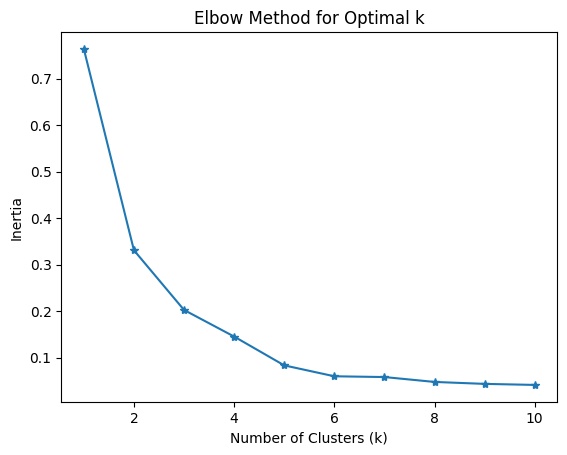

In [53]:
scaler = preprocessing.StandardScaler()

X_scaled = scaler.fit_transform(result_df.T).T
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=35)
    kmeans.fit(X_scaled )
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='*')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

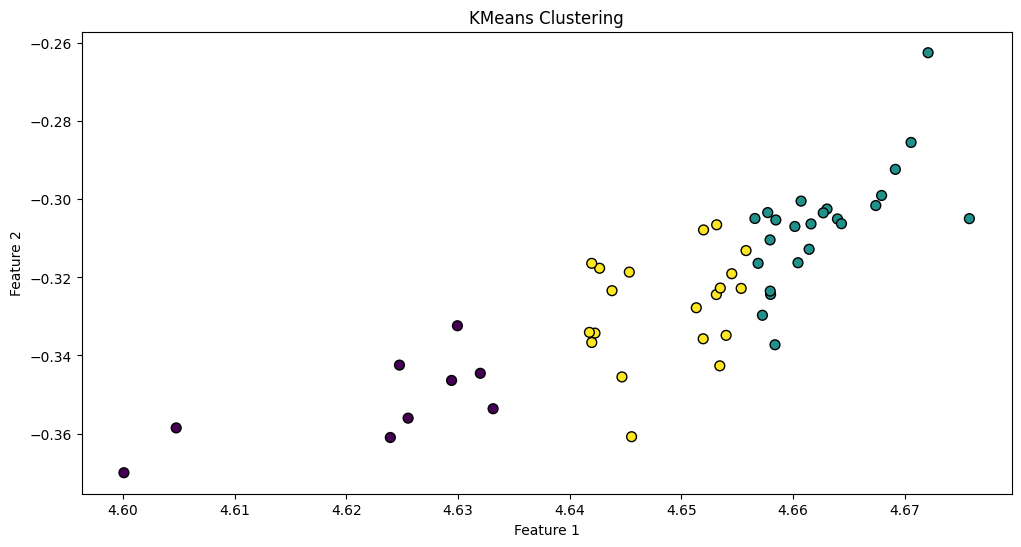

,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:,Deviations
Alabama,14.830247,0.460484,-0.016270,0.079559,0.981377,0.969183,0.948999,0.924297,0.960556,0.972983,0.926957,0.917467,0.975461,0.930405,0.977169,0.964101,0.904244,0.879563,0.962956,0.945743,0.915215,0.879368,-0.182547,1
Alaska,14.679963,0.468554,-0.024265,0.080901,0.987230,0.961276,0.943474,0.936315,0.970373,0.967257,0.881000,0.920677,0.975696,0.969681,0.970649,0.952627,0.908822,0.849993,0.978561,0.960961,0.911506,0.899134,-0.145757,1
Arizona,15.835876,0.513430,-0.021552,0.071503,0.981365,0.962420,0.949394,0.939375,0.962654,0.964430,0.935049,0.906674,0.975792,0.973015,0.971957,0.961684,0.942499,0.859815,0.958326,0.960924,0.937928,0.863929,-0.129661,1
Arkansas,13.731457,0.455518,-0.017321,0.083194,0.980482,0.966167,0.961457,0.926568,0.956262,0.964861,0.923118,0.922091,0.979871,0.968836,0.976715,0.959874,0.922172,0.881102,0.964870,0.957578,0.878845,0.875829,-0.189203,2
California,11.060209,0.476201,-0.026682,0.053717,0.969572,0.949060,0.941613,0.935238,0.951102,0.950523,0.907149,0.915946,0.961438,0.959071,0.962465,0.953629,0.902286,0.840653,0.956802,0.948121,0.913250,0.853289,-0.118301,0
Colorado,12.355546,0.542576,-0.026383,0.065810,0.983214,0.966406,0.959804,0.925842,0.968269,0.970365,0.927418,0.949785,0.965698,0.958939,0.977366,0.969800,0.944220,0.877179,0.966405,0.971504,0.961649,0.860811,-0.163699,2
Connecticut,12.362313,0.517933,-0.022136,0.055552,0.977190,0.965444,0.934810,0.912858,0.963987,0.957724,0.953613,0.897843,0.947067,0.966325,0.958343,0.951960,0.913320,0.866610,0.974891,0.957483,0.913668,0.880532,-0.158106,2
Delaware,12.323079,0.497461,-0.021380,0.069506,0.979375,0.962474,0.953811,0.910868,0.957959,0.963081,0.946647,0.949897,0.983740,0.978119,0.967166,0.964820,0.930305,0.885724,0.950825,0.950349,0.875321,0.910404,-0.178303,2
District of Columbia,18.888925,0.583615,-0.037119,0.056875,0.978919,0.927283,0.874420,0.814404,0.975767,0.976403,0.901833,0.892496,0.984106,0.956246,0.931689,0.955796,0.927308,0.794275,0.980782,0.962891,0.894430,0.723267,-0.130039,1
Florida,12.152122,0.505144,-0.018347,0.059311,0.977801,0.966276,0.957085,0.945739,0.966006,0.965772,0.933617,0.928191,0.964614,0.973583,0.973892,0.962377,0.915861,0.872746,0.972895,0.959029,0.936807,0.876766,-0.143168,2


,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:,Deviation
Alabama,0.741270,-0.036210,0.004608,0.008505,-0.000152,0.004641,-0.002470,-0.005091,-0.006039,0.008116,0.002495,0.001212,0.007470,-0.038944,0.006076,0.002128,-0.015818,0.012414,-0.007974,-0.015854,-0.015338,-0.008412,-1.821956e-02,0.628412
Alaska,0.590986,-0.028140,-0.003388,0.009848,0.005700,-0.003266,-0.007995,0.006927,0.003779,0.002390,-0.043463,0.004422,0.007705,0.000333,-0.000443,-0.009346,-0.011241,-0.017156,0.007630,-0.000637,-0.019047,0.011354,1.856998e-02,0.525522
Arizona,1.746899,0.016736,-0.000674,0.000449,-0.000164,-0.002122,-0.002075,0.009987,-0.003940,-0.000437,0.010586,-0.009581,0.007801,0.003667,0.000865,-0.000289,0.022436,-0.007335,-0.012605,-0.000673,0.007376,-0.023852,3.466612e-02,1.797720
Arkansas,-0.357520,-0.041176,0.003557,0.012140,-0.001048,0.001625,0.009988,-0.002820,-0.010332,-0.000006,-0.001345,0.005836,0.011880,-0.000512,0.005623,-0.002099,0.002109,0.013953,-0.006060,-0.004020,-0.051708,-0.011952,-2.487562e-02,-0.448761
California,-3.028768,-0.020492,-0.005804,-0.017337,-0.011957,-0.015482,-0.009856,0.005850,-0.015492,-0.014344,-0.017313,-0.000309,-0.006553,-0.010277,-0.008627,-0.008344,-0.017776,-0.026497,-0.014129,-0.013476,-0.017303,-0.034492,4.602640e-02,-3.262751
Colorado,-1.733431,0.045882,-0.005505,-0.005244,0.001685,0.001864,0.008335,-0.003546,0.001675,0.005498,0.002956,0.033529,-0.002292,-0.010409,0.006273,0.007827,0.024158,0.010030,-0.004526,0.009907,0.031097,-0.026969,6.285138e-04,-1.600578
Connecticut,-1.726664,0.021239,-0.001258,-0.015502,-0.004340,0.000902,-0.016659,-0.016530,-0.002608,-0.007143,0.029150,-0.018412,-0.020923,-0.003023,-0.012749,-0.010013,-0.006742,-0.000539,0.003961,-0.004114,-0.016884,-0.007248,6.221586e-03,-1.829878
Delaware,-1.765898,0.000767,-0.000503,-0.001548,-0.002154,-0.002068,0.002342,-0.018519,-0.008636,-0.001786,0.022184,0.033642,0.015749,0.008771,-0.003926,0.002848,0.010243,0.018575,-0.020106,-0.011249,-0.055232,0.022624,-1.397552e-02,-1.767857
District of Columbia,4.799948,0.086921,-0.016242,-0.014179,-0.002611,-0.037259,-0.077049,-0.114984,0.009173,0.011536,-0.022630,-0.023759,0.016115,-0.013102,-0.039403,-0.006177,0.007246,-0.072874,0.009852,0.001294,-0.036122,-0.164513,3.428835e-02,4.335470
Florida,-1.936855,0.008450,0.002531,-0.011743,-0

In [56]:
# Clustering using KMeans
kmeans = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
result_df_copy = result_df.copy()
result_df_copy['Deviations']  = kmeans_labels
# Visualize the clusters
plt.figure(figsize=(12, 6))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

display(result_df_copy)


difference = result_df.subtract(result_df.loc['YARDSTICK'], axis=1)
difference.index = result_df.index
pd.set_option('display.max_rows', None)
difference['Deviation'] = difference.sum(axis=1)
difference = difference.drop('YARDSTICK', axis=0)
display(difference)

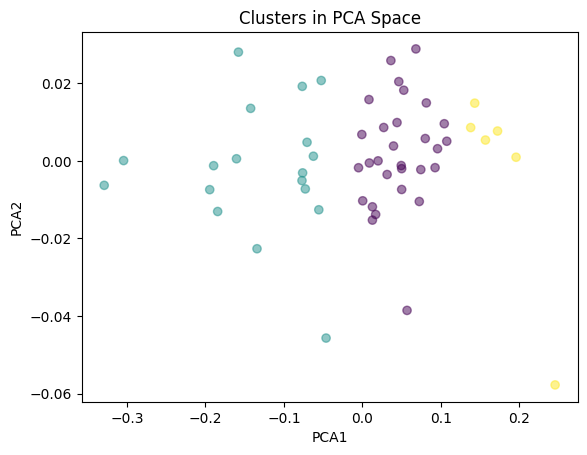

Silhouette Score: 0.4798092107361556


,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:,Cluster
Alabama,14.830247,0.460484,-0.016270,0.079559,0.981377,0.969183,0.948999,0.924297,0.960556,0.972983,0.926957,0.917467,0.975461,0.930405,0.977169,0.964101,0.904244,0.879563,0.962956,0.945743,0.915215,0.879368,-0.182547,0
Alaska,14.679963,0.468554,-0.024265,0.080901,0.987230,0.961276,0.943474,0.936315,0.970373,0.967257,0.881000,0.920677,0.975696,0.969681,0.970649,0.952627,0.908822,0.849993,0.978561,0.960961,0.911506,0.899134,-0.145757,0
Arizona,15.835876,0.513430,-0.021552,0.071503,0.981365,0.962420,0.949394,0.939375,0.962654,0.964430,0.935049,0.906674,0.975792,0.973015,0.971957,0.961684,0.942499,0.859815,0.958326,0.960924,0.937928,0.863929,-0.129661,0
Arkansas,13.731457,0.455518,-0.017321,0.083194,0.980482,0.966167,0.961457,0.926568,0.956262,0.964861,0.923118,0.922091,0.979871,0.968836,0.976715,0.959874,0.922172,0.881102,0.964870,0.957578,0.878845,0.875829,-0.189203,0
California,11.060209,0.476201,-0.026682,0.053717,0.969572,0.949060,0.941613,0.935238,0.951102,0.950523,0.907149,0.915946,0.961438,0.959071,0.962465,0.953629,0.902286,0.840653,0.956802,0.948121,0.913250,0.853289,-0.118301,1
Colorado,12.355546,0.542576,-0.026383,0.065810,0.983214,0.966406,0.959804,0.925842,0.968269,0.970365,0.927418,0.949785,0.965698,0.958939,0.977366,0.969800,0.944220,0.877179,0.966405,0.971504,0.961649,0.860811,-0.163699,1
Connecticut,12.362313,0.517933,-0.022136,0.055552,0.977190,0.965444,0.934810,0.912858,0.963987,0.957724,0.953613,0.897843,0.947067,0.966325,0.958343,0.951960,0.913320,0.866610,0.974891,0.957483,0.913668,0.880532,-0.158106,1
Delaware,12.323079,0.497461,-0.021380,0.069506,0.979375,0.962474,0.953811,0.910868,0.957959,0.963081,0.946647,0.949897,0.983740,0.978119,0.967166,0.964820,0.930305,0.885724,0.950825,0.950349,0.875321,0.910404,-0.178303,1
District of Columbia,18.888925,0.583615,-0.037119,0.056875,0.978919,0.927283,0.874420,0.814404,0.975767,0.976403,0.901833,0.892496,0.984106,0.956246,0.931689,0.955796,0.927308,0.794275,0.980782,0.962891,0.894430,0.723267,-0.130039,2
Florida,12.152122,0.505144,-0.018347,0.059311,0.977801,0.966276,0.957085,0.945739,0.966006,0.965772,0.933617,0.928191,0.964614,0.973583,0.973892,0.962377,0.915861,0.872746,0.972895,0.959029,0.936807,0.876766,-0.143168,1


In [57]:
result_df_copy = result_df.copy()
kmeans = cluster.KMeans(n_clusters=3, random_state=35, n_init='auto')

clusters = kmeans.fit_predict(result_df)
scaler = preprocessing.StandardScaler()

scaled_data = scaler.fit_transform(result_df.T).T
# Add the cluster labels to the original DataFrame
result_df_copy['Cluster'] = clusters
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Scatter plot of the clusters in 2D PCA space
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters in PCA Space')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

# Evaluate clustering performance using silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')
display(result_df_copy)

In [58]:
column_range = difference['Deviation'].max() - difference['Deviation'].min()

print("\nMaximum Deviation:", difference['Deviation'].max())
print("\nRange of Deviation:", column_range)
print("\nMinimum Deviation:", difference['Deviation'].min())


Maximum Deviation: 5.064478516301051

Range of Deviation: 9.750182187072479

Minimum Deviation: -4.685703670771429


In [59]:
# Generate labels for the data using the results of the clustering
def classify(num):
  if num > 3:
    return "Good"
  elif num < -1:
    return 'Poor'
  else:
    return 'Fair'
difference["Hiring Practices"] = difference['Deviation'].apply(classify)
display(difference)
increasing = difference[difference["Hiring Practices"] == 'Good'].index
print('\nThe states with predicted good hiring practices:')
for i,name in enumerate(increasing):
    print(f'{i+1}. {name}')
print('\nThe states with predicted fair hiring practices:')
average = difference[difference["Hiring Practices"] == 'Fair'].index
for i,name in enumerate(average):
  print(f'{i+1}. {name}', end = "\n")
print('\nThe states with predicted poor hiring practices:')
decreasing = difference[difference["Hiring Practices"] == 'Poor'].index
for i,name in enumerate(decreasing):
    print(f'{i+1}. {name}')

,Count_Worker_NAICSTotalAllIndustries,Count_Person_Employed,Count_Person_Unemployed,Estimate!!Total:!!In the labor force:!!Employed:!!With a disability:,Estimate!!Total:!!Bachelor's degree or higher:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Some college or associate's degree:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!High school graduate (includes equivalency):!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Less than high school graduate:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:White!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Black!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 64 years:Asian!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Male:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!25 to 44 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!20 to 24 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!Female:!!16 to 19 years:!!In labor force:!!Civilian:!!Employed,Estimate!!Total:!!In the labor force:!!Unemployed:!!With a disability:,Deviation,Hiring Practices
Alabama,0.741270,-0.036210,0.004608,0.008505,-0.000152,0.004641,-0.002470,-0.005091,-0.006039,0.008116,0.002495,0.001212,0.007470,-0.038944,0.006076,0.002128,-0.015818,0.012414,-0.007974,-0.015854,-0.015338,-0.008412,-1.821956e-02,0.628412,Fair
Alaska,0.590986,-0.028140,-0.003388,0.009848,0.005700,-0.003266,-0.007995,0.006927,0.003779,0.002390,-0.043463,0.004422,0.007705,0.000333,-0.000443,-0.009346,-0.011241,-0.017156,0.007630,-0.000637,-0.019047,0.011354,1.856998e-02,0.525522,Fair
Arizona,1.746899,0.016736,-0.000674,0.000449,-0.000164,-0.002122,-0.002075,0.009987,-0.003940,-0.000437,0.010586,-0.009581,0.007801,0.003667,0.000865,-0.000289,0.022436,-0.007335,-0.012605,-0.000673,0.007376,-0.023852,3.466612e-02,1.797720,Fair
Arkansas,-0.357520,-0.041176,0.003557,0.012140,-0.001048,0.001625,0.009988,-0.002820,-0.010332,-0.000006,-0.001345,0.005836,0.011880,-0.000512,0.005623,-0.002099,0.002109,0.013953,-0.006060,-0.004020,-0.051708,-0.011952,-2.487562e-02,-0.448761,Fair
California,-3.028768,-0.020492,-0.005804,-0.017337,-0.011957,-0.015482,-0.009856,0.005850,-0.015492,-0.014344,-0.017313,-0.000309,-0.006553,-0.010277,-0.008627,-0.008344,-0.017776,-0.026497,-0.014129,-0.013476,-0.017303,-0.034492,4.602640e-02,-3.262751,Poor
Colorado,-1.733431,0.045882,-0.005505,-0.005244,0.001685,0.001864,0.008335,-0.003546,0.001675,0.005498,0.002956,0.033529,-0.002292,-0.010409,0.006273,0.007827,0.024158,0.010030,-0.004526,0.009907,0.031097,-0.026969,6.285138e-04,-1.600578,Poor
Connecticut,-1.726664,0.021239,-0.001258,-0.015502,-0.004340,0.000902,-0.016659,-0.016530,-0.002608,-0.007143,0.029150,-0.018412,-0.020923,-0.003023,-0.012749,-0.010013,-0.006742,-0.000539,0.003961,-0.004114,-0.016884,-0.007248,6.221586e-03,-1.829878,Poor
Delaware,-1.765898,0.000767,-0.000503,-0.001548,-0.002154,-0.002068,0.002342,-0.018519,-0.008636,-0.001786,0.022184,0.033642,0.015749,0.008771,-0.003926,0.002848,0.010243,0.018575,-0.020106,-0.011249,-0.055232,0.022624,-1.397552e-02,-1.767857,Poor
District of Columbia,4.799948,0.086921,-0.016242,-0.014179,-0.002611,-0.037259,-0.077049,-0.114984,0.009173,0.011536,-0.022630,-0.023759,0.016115,-0.013102,-0.039403,-0.006177,0.007246,-0.072874,0.009852,0.001294,-0.036122,-0.164513,3.428835e-02,


The states with predicted good hiring practices:
1. District of Columbia
2. Indiana
3. Ohio
4. Texas
5. Washington
6. Puerto Rico

The states with predicted fair hiring practices:
1. Alabama
2. Alaska
3. Arizona
4. Arkansas
5. Georgia
6. Illinois
7. Iowa
8. Kansas
9. Kentucky
10. Louisiana
11. Maryland
12. Massachusetts
13. Michigan
14. Minnesota
15. Mississippi
16. Nebraska
17. Nevada
18. New Jersey
19. New Mexico
20. New York
21. North Carolina
22. North Dakota
23. Oklahoma
24. Pennsylvania
25. South Carolina
26. Tennessee
27. Utah
28. Virginia
29. Wisconsin

The states with predicted poor hiring practices:
1. California
2. Colorado
3. Connecticut
4. Delaware
5. Florida
6. Hawaii
7. Idaho
8. Maine
9. Missouri
10. Montana
11. New Hampshire
12. Oregon
13. Rhode Island
14. South Dakota
15. Vermont
16. West Virginia
17. Wyoming


In [81]:
numeric_columns = result_df.select_dtypes(include=['float64', 'int64']).columns
classification_data = result_df.copy()
classification_data['target'] = difference["Hiring Practices"].copy()

In [87]:
# Split data into training and testing datasets
classification_data = classification_data.apply(lambda x: x.fillna(x.mode().iloc[0]))

test_target = classification_data['target']
test_vars = classification_data.drop('target', axis=1)
(state_train_ftrs, state_test_ftrs,
 state_train_tgt,  state_test_tgt) = skms.train_test_split(test_vars,
                                                         test_target,
                                                         test_size=.3, random_state=35)

In [135]:
# Train and test data with KNN model
knn   = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_fit   = knn.fit(state_train_ftrs, state_train_tgt)
knn_pred = knn.predict(state_test_ftrs)

print("KNN Accuracy:",
      metrics.accuracy_score(state_test_tgt, knn_pred))
knn_auc = roc_auc_score(pd.get_dummies(state_test_tgt),
                        knn.predict_proba(state_test_ftrs), multi_class='ovr')
print("KNN AUC: ", round(knn_auc, 3))
print("Classification Report: ")
print(metrics.classification_report(state_test_tgt, knn_pred))

KNN Accuracy: 0.9375
KNN AUC:  0.99
Classification Report: 
              precision    recall  f1-score   support

        Fair       1.00      0.88      0.93         8
        Good       1.00      1.00      1.00         4
        Poor       0.80      1.00      0.89         4

    accuracy                           0.94        16
   macro avg       0.93      0.96      0.94        16
weighted avg       0.95      0.94      0.94        16



In [136]:
# Train and test data with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(state_train_ftrs, state_train_tgt)
rf_pred = rf.predict(state_test_ftrs)

print("Random Forest Accuracy: ", metrics.accuracy_score(state_test_tgt, rf_pred))
try:
  rf_auc = roc_auc_score(pd.get_dummies(state_test_tgt), rf.predict_proba(state_test_ftrs), multi_class='ovr')
  print("Random Forest AUC: ", round(rf_auc, 3))
except:
  print("Random Forest AUC: not aailable")
print("Classification Report: ")
print(metrics.classification_report(state_test_tgt, rf_pred, zero_division=0))

Random Forest Accuracy:  0.625
Random Forest AUC:  0.912
Classification Report: 
              precision    recall  f1-score   support

        Fair       0.58      0.88      0.70         8
        Good       0.00      0.00      0.00         4
        Poor       0.75      0.75      0.75         4

    accuracy                           0.62        16
   macro avg       0.44      0.54      0.48        16
weighted avg       0.48      0.62      0.54        16



In [157]:
# Train and test data using Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(state_train_ftrs, state_train_tgt)
lr_pred = lr.predict(state_test_ftrs)

print("Logistic Regression Accuracy: ", metrics.accuracy_score(state_test_tgt, lr_pred))
lr_auc = roc_auc_score(pd.get_dummies(state_test_tgt), lr.predict_proba(state_test_ftrs), multi_class='ovr')
print("Logistic Regression AUC: ", round(lr_auc, 3))
print("Classification Report: ")
print(metrics.classification_report(state_test_tgt, lr_pred))

Logistic Regression Accuracy:  0.875
Logistic Regression AUC:  0.99
Classification Report: 
              precision    recall  f1-score   support

        Fair       0.80      1.00      0.89         8
        Good       1.00      0.50      0.67         4
        Poor       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.93      0.83      0.85        16
weighted avg       0.90      0.88      0.86        16



In [138]:
# Specify the number of folds (e.g., 5-fold cross-validation)
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
models = [('KNN', knn), ("Random Forest", rf), ("Logistic Regression", lr)]

# Perform cross-validation and get accuracy scores for each model
for name, model in models:
  cv_scores = cross_val_score(model, test_vars, test_target, cv=cv, scoring='accuracy')
  print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.3f}")

KNN Cross-Validation Accuracy: 0.980
Random Forest Cross-Validation Accuracy: 0.829
Logistic Regression Cross-Validation Accuracy: 0.980


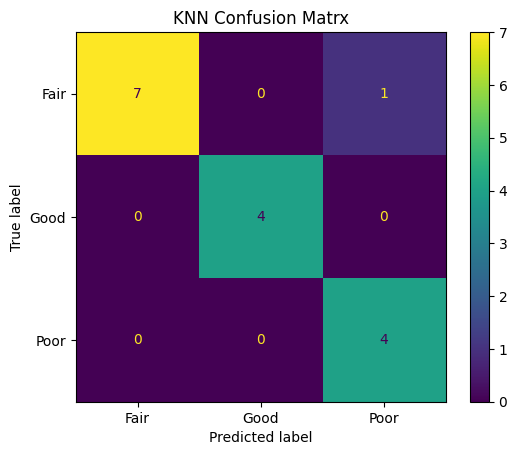

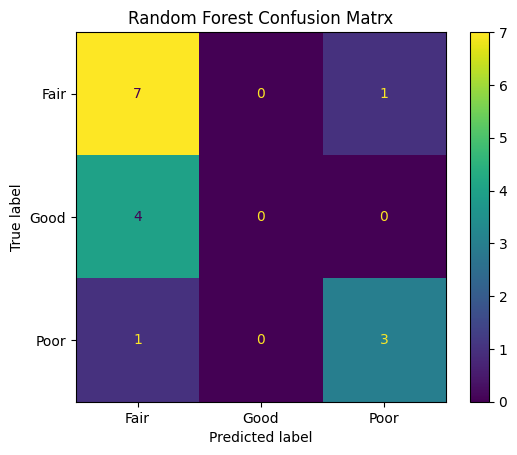

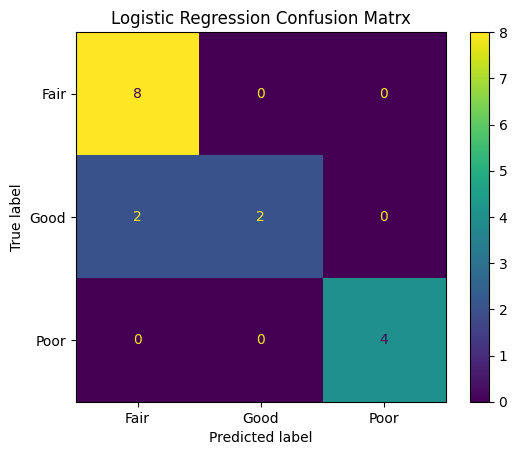

In [140]:
# Create a Confusion Matrix for each model
from sklearn.metrics import ConfusionMatrixDisplay
models_pred = [("KNN", knn, knn_pred), ("Random Forest", rf, rf_pred), ("Logistic Regression", lr, lr_pred)]
for name, model, pred in models_pred:
  cm = confusion_matrix(state_test_tgt, pred)
  display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fair", "Good", "Poor"])
  display.plot()
  plt.title(f"{name} Confusion Matrx")
  plt.show()
# cm = metrics.confusion_matrix(state_test_tgt, preds)
# cm_df = pd.DataFrame(cm, index=['Poor', 'Fair', 'Good'], columns=['Poor', "Fair", 'Good'])
# display(cm_df)


---KNN----

Binary Classification for Good

Binary Classification for Fair

Binary Classification for Poor


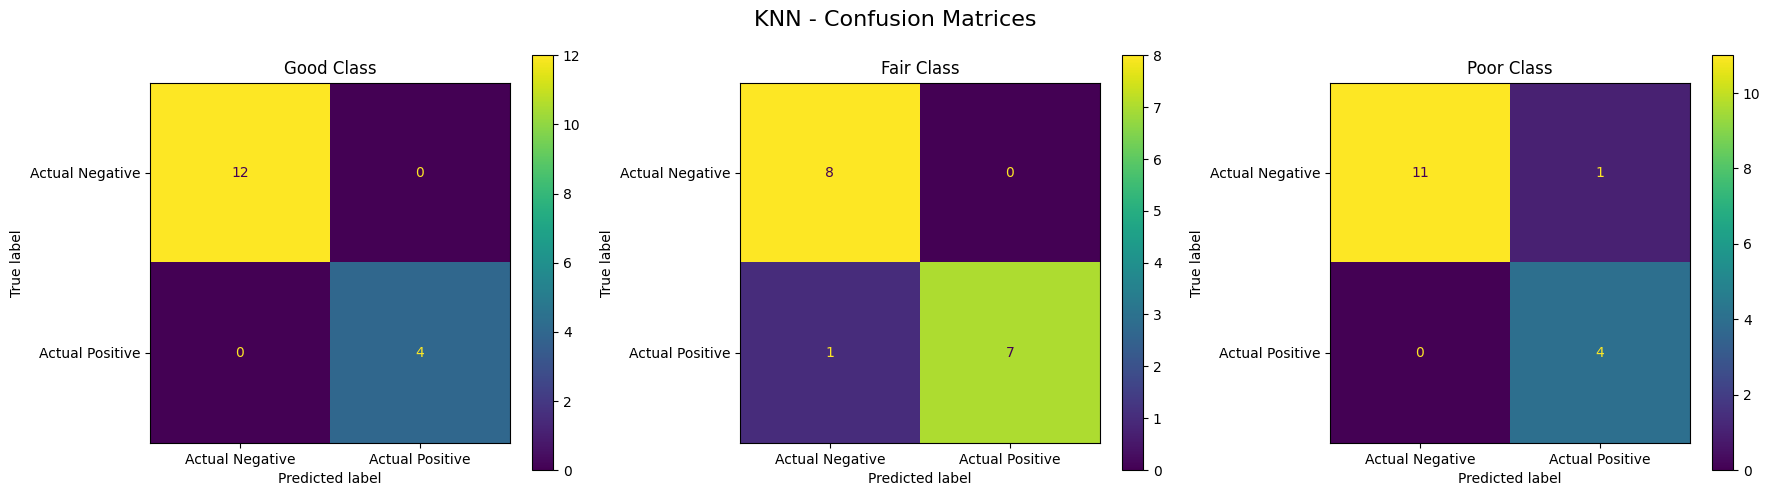


---Random Forest----

Binary Classification for Good

Binary Classification for Fair

Binary Classification for Poor


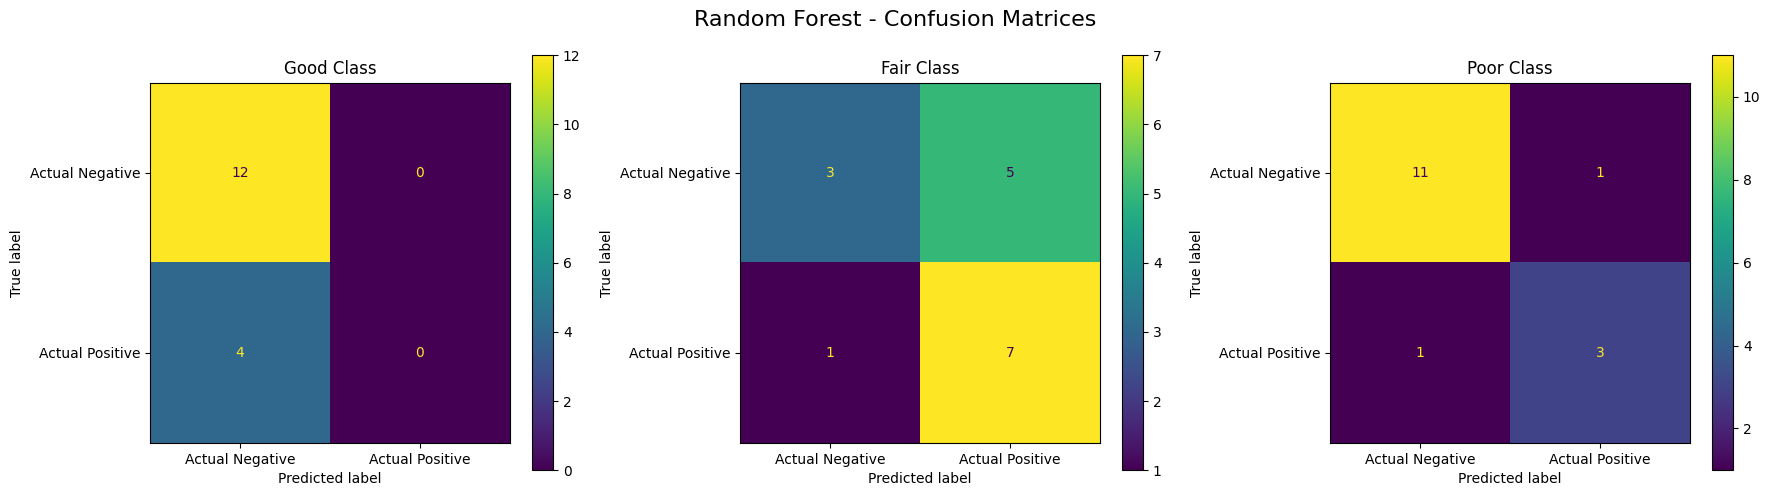


---Logistic Regression----

Binary Classification for Good

Binary Classification for Fair

Binary Classification for Poor


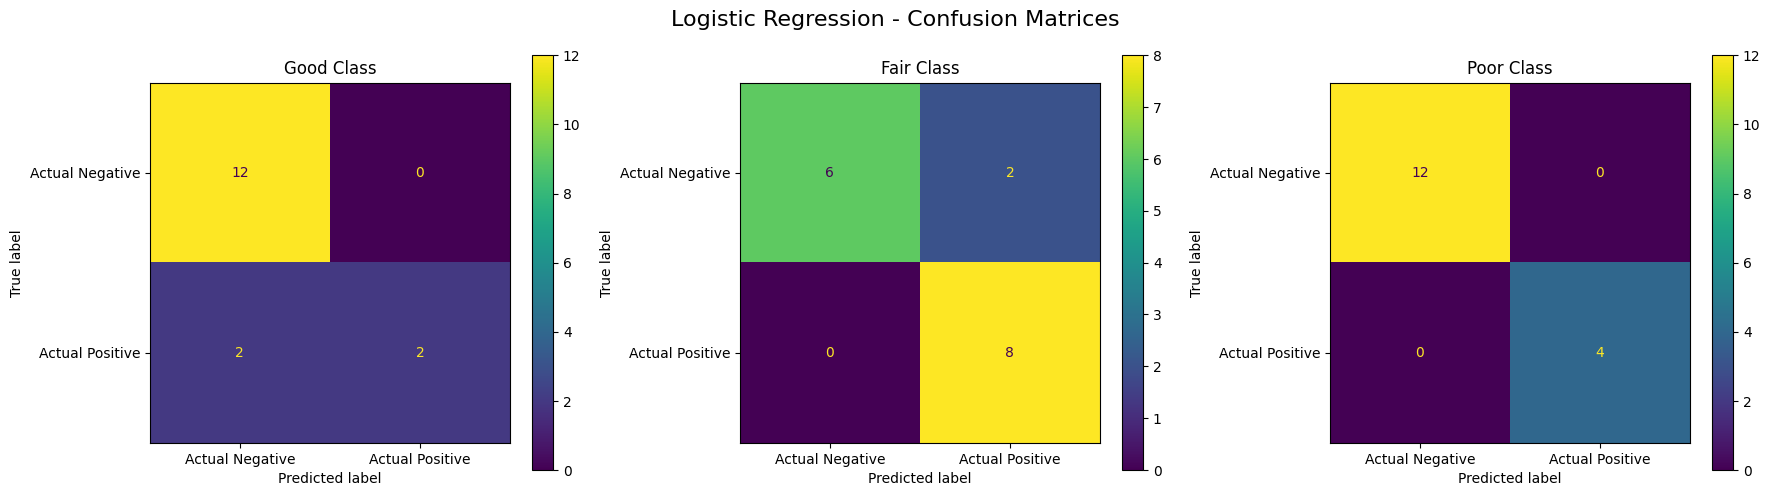

In [141]:
classes = ['Good', 'Fair', 'Poor']
# Loop through each model
for name, model, pred in models_pred:
  print(f"\n---{name}----")
  # Display confusion matrices in 3 matrices per row
  fig, axes = plt.subplots(1, 3, figsize=(18, 5))
  #Loop through each class
  for idx, label in enumerate(classes):
    print(f"\nBinary Classification for {label}")
    # Create binary labels
    y_true_binary = (state_test_tgt == label)
    y_pred_binary = (pred == label)

    # Confusion Matrix
    cm = confusion_matrix(y_true_binary, y_pred_binary)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['Actual Negative', 'Actual Positive'])
    disp.plot(ax=axes[idx], values_format='d')
    axes[idx].set_title(f"{label} Class")
  fig.suptitle(f"{name} - Confusion Matrices", fontsize=16)
  plt.tight_layout()
  plt.show()

In [145]:
from sklearn.metrics import roc_curve, auc

def plot_ROC(model, X_test, y_test, model_name):
  '''
  function to plot ROC curve for a specific binary class ('Good', 'Fair', 'Poor').

  Params:
  - model: trained sklearn model (KNN, RF, Logistic)
  - X_test: testing features
  - y_test: testing labels
  - class_label: the class to plot
  - model_name: name of the model
  '''

  classes = ['Good', 'Fair', 'Poor']

  plt.figure(figsize=(8,6))

  for class_label in classes:
      # Create binary labels
      y_test_binary = (y_test == class_label)

      # Predict probabilities for this class
      y_score = model.predict_proba(X_test)[:, list(model.classes_).index(class_label)]

      # Compute ROC curve
      fpr, tpr, _ = roc_curve(y_test_binary, y_score)
      roc_auc = auc(fpr, tpr)

      # Plot ROC curve
      plt.plot(fpr, tpr, lw=2, label=f'{class_label} (AUC = {roc_auc:.2f})')

  # Plot random line
  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'ROC Curve for {model_name}')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()



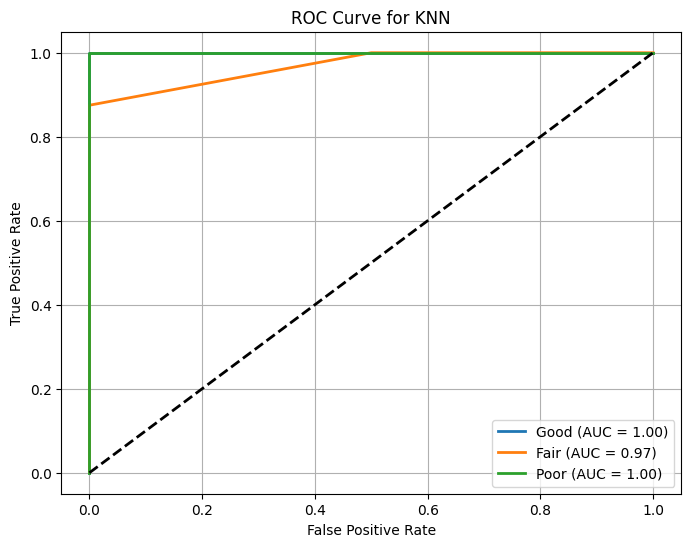

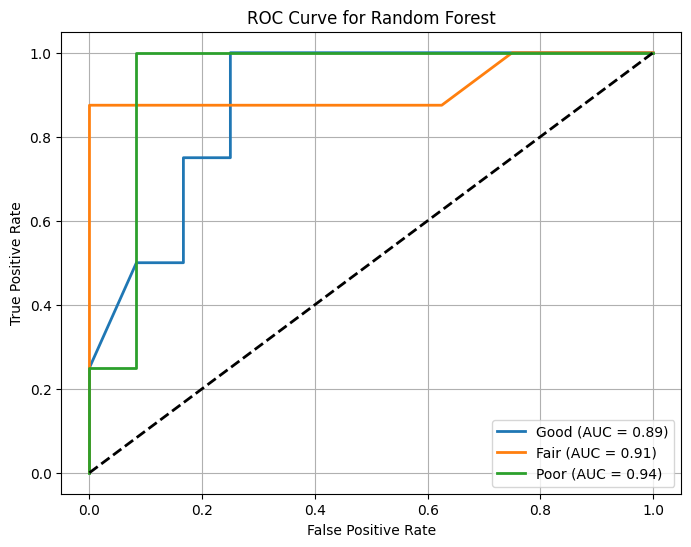

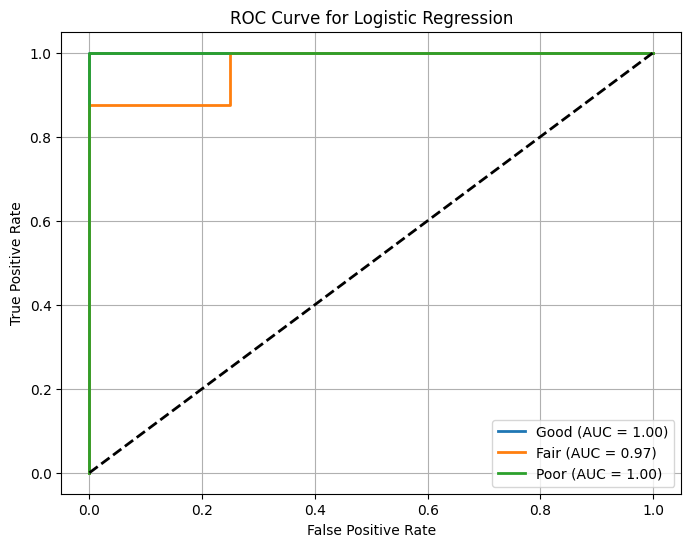

In [147]:
plot_ROC(knn, state_test_ftrs, state_test_tgt, "KNN")
plot_ROC(rf, state_test_ftrs, state_test_tgt, "Random Forest")
plot_ROC(lr, state_test_ftrs, state_test_tgt, "Logistic Regression")

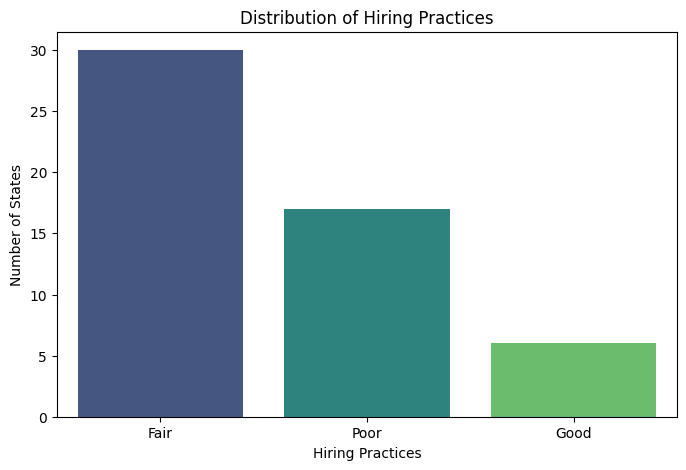

In [153]:
plt.figure(figsize=(8, 5))
sns.countplot(x='target', hue='target', data=classification_data, palette='viridis', legend=False)
plt.title('Distribution of Hiring Practices')
plt.xlabel('Hiring Practices')
plt.ylabel('Number of States')
plt.show()

In [154]:
results = {
    "KNN": {"Accuracy": 0.9375, "AUC": 0.99},
    "Random Forest": {"Accuracy": 0.625, "AUC": 0.912},
    "Logistic Regression": {"Accuracy": 0.875, "AUC": 0.99}
}

final_df = pd.DataFrame(results).T
print(final_df)

                     Accuracy    AUC
KNN                    0.9375  0.990
Random Forest          0.6250  0.912
Logistic Regression    0.8750  0.990


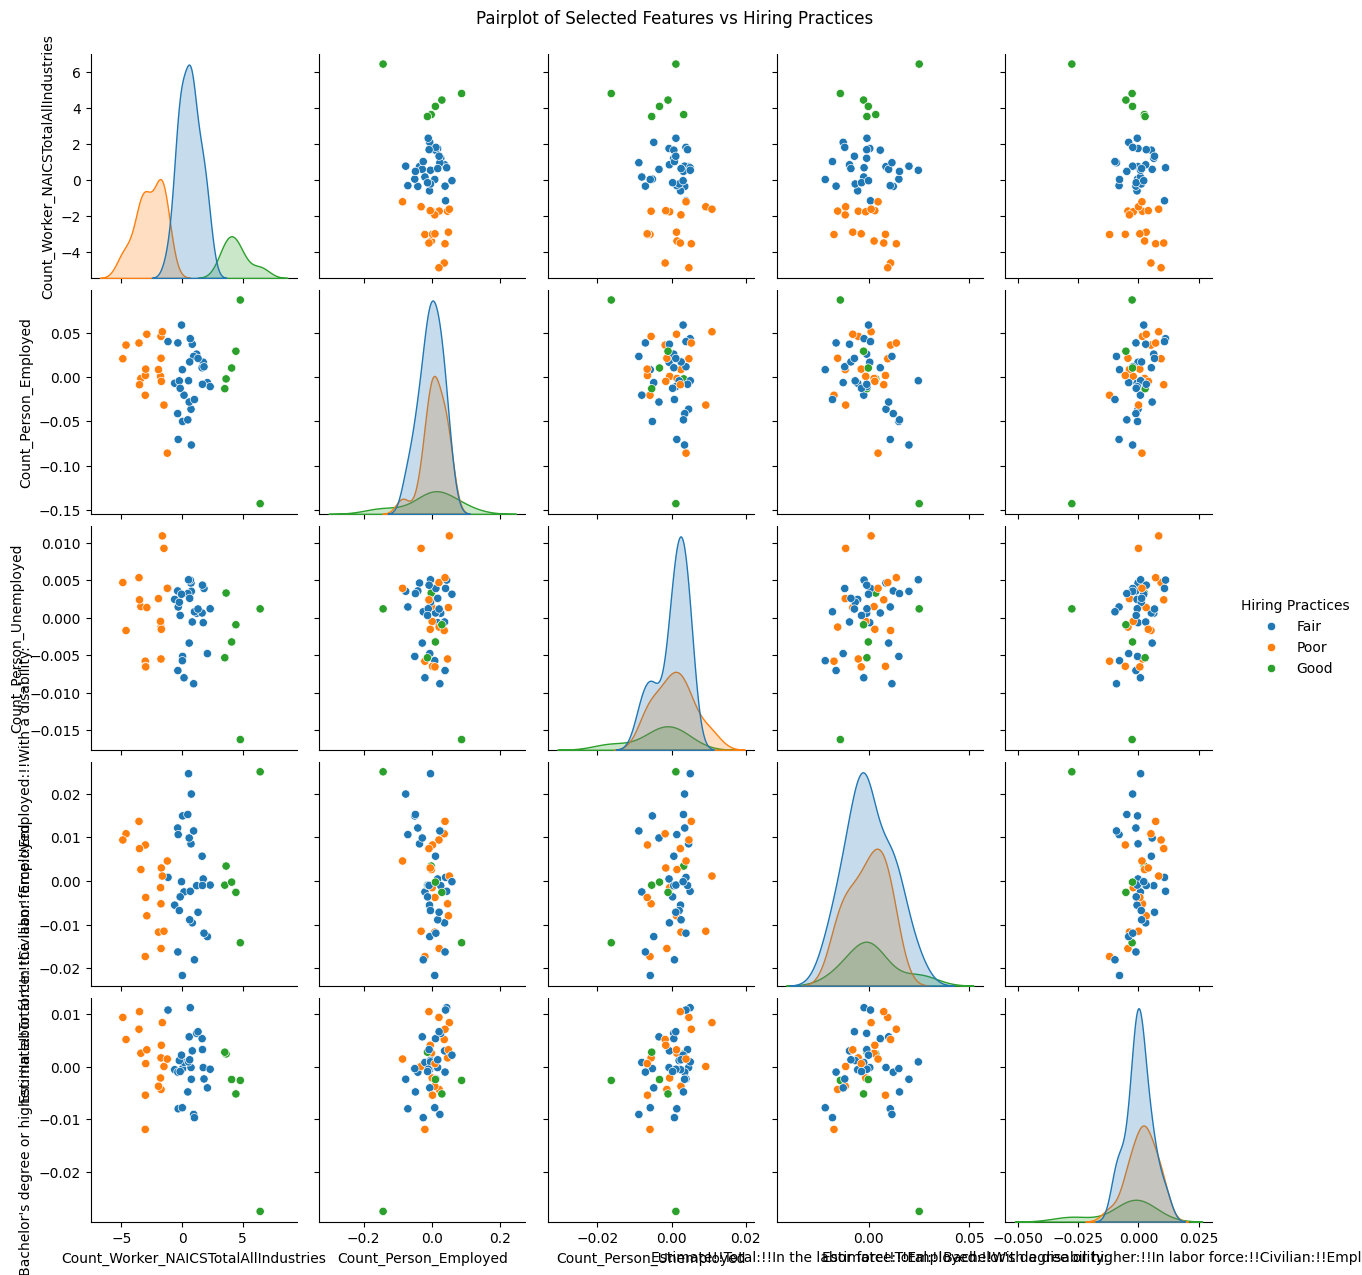

In [156]:
factor_columns = difference.columns.tolist()
selected_columns = factor_columns[:5]
selected_columns.append('Hiring Practices')

# Create pairplot
sns.pairplot(difference[selected_columns], hue='Hiring Practices', height=2.5)
plt.suptitle("Pairplot of Selected Features vs Hiring Practices", y=1.02)
plt.show()